# Missions
- Explain how you dealt with missing data
- Present how the performance is affected from different alternatives:
- Complete case analysis
Keeping the missing values and using models that can use them as

1.   Complete case analysis
2.   Keeping the missing values and using models that can use them as inputs
3. Impute with a “missing” category
4. Various imputing alternatives (at least one of these should be multiple
imputation)

• Give examples to specific values that were imputed so that Dr. Smith
can give you some input if they seem medically reasonable

# Imports and data reading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import random
import missingno as msno

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/מודלי חיזוי ברפואה/training_v2.csv")
df.head()

encounter_id  patient_id  hospital_id  hospital_death   age    bmi  \
0         66154       25312          118               0  68.0  22.73   
1        114252       59342           81               0  77.0  27.42   
2        119783       50777          118               0  25.0  31.95   
3         79267       46918          118               0  81.0  22.64   
4         92056       34377           33               0  19.0    NaN   

   elective_surgery  ethnicity gender  height  ... aids cirrhosis  \
0                 0  Caucasian      M   180.3  ...  0.0       0.0   
1                 0  Caucasian      F   160.0  ...  0.0       0.0   
2                 0  Caucasian      F   172.7  ...  0.0       0.0   
3                 1  Caucasian      F   165.1  ...  0.0       0.0   
4                 0  Caucasian      M   188.0  ...  0.0       0.0   

   diabetes_mellitus hepatic_failure immunosuppression  leukemia  lymphoma  \
0                1.0             0.0               0.0       0.0       0.0   
1                1.0             0.0               0.0       0.0       0.0   
2                0.0             0.0               0.0       0.0       0.0   
3                0.0             0.0               0.0       0.0       0.0   
4                0.0             0.0               0.0       0.0       0.0   

   solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  
0                          0.0                Sepsis       Cardiovascular  
1                          0.0           Respiratory          Respiratory  
2                          0.0             Metabolic            Metabolic  
3                          0.0        Cardiovascular       Cardiovascular  
4                          0.0                Trauma               Trauma  

[5 rows x 186 columns]

In [ ]:
column_descriptions = pd.read_csv("/content/drive/MyDrive/מודלי חיזוי ברפואה/WiDS Datathon 2020 Dictionary.csv")

drop the apache predictions:

In [ ]:
df = df.drop(columns=['apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob'])

## missing values visualiziations

https://github.com/ResidentMario/missingno

In [ ]:
!pip install missingno

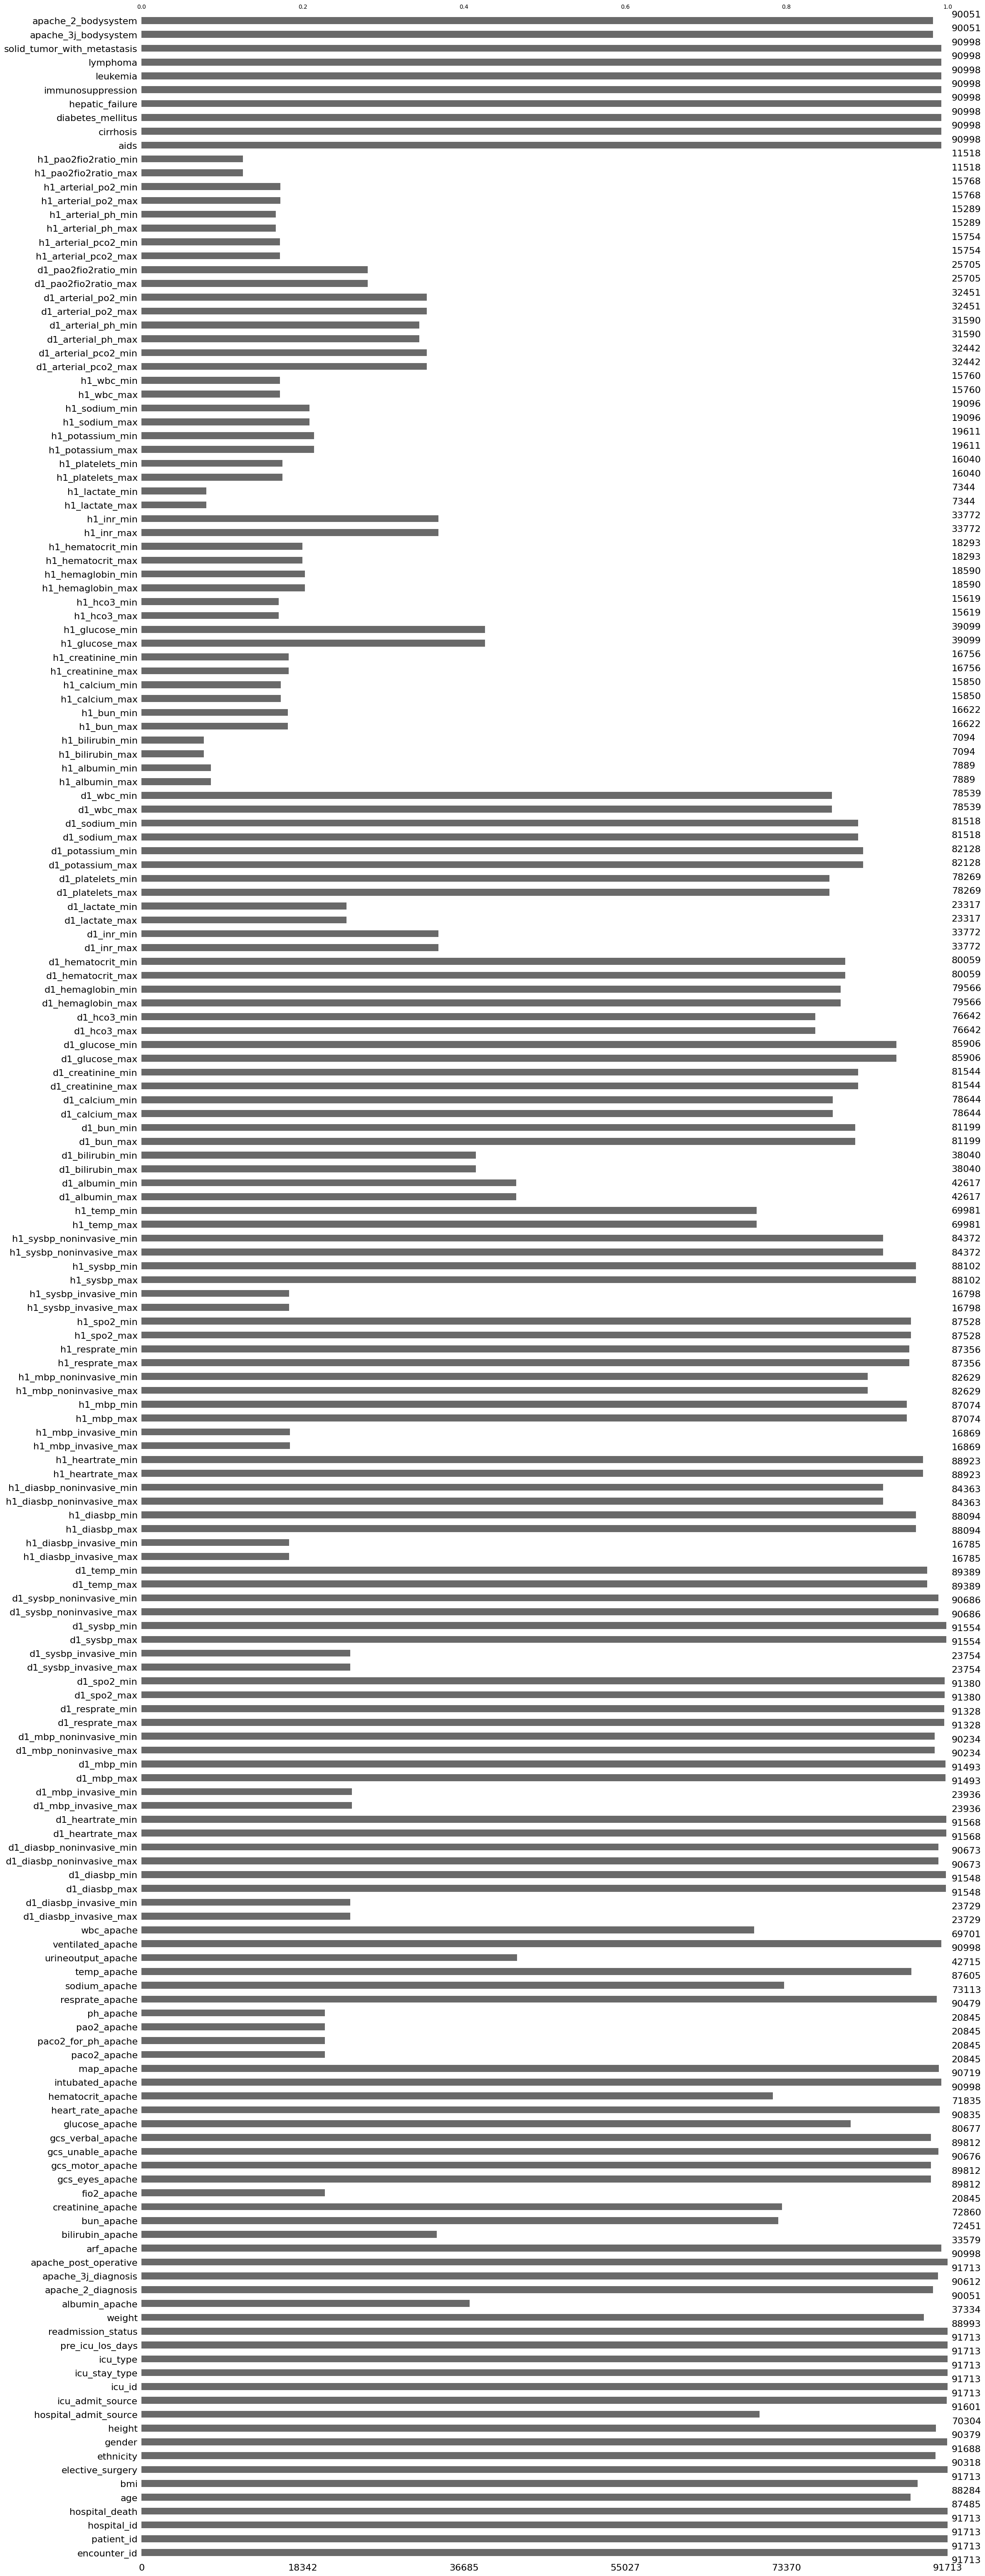

In [ ]:
#Bar Chart
msno.bar(df)
plt.savefig('bar.png', dpi=150)

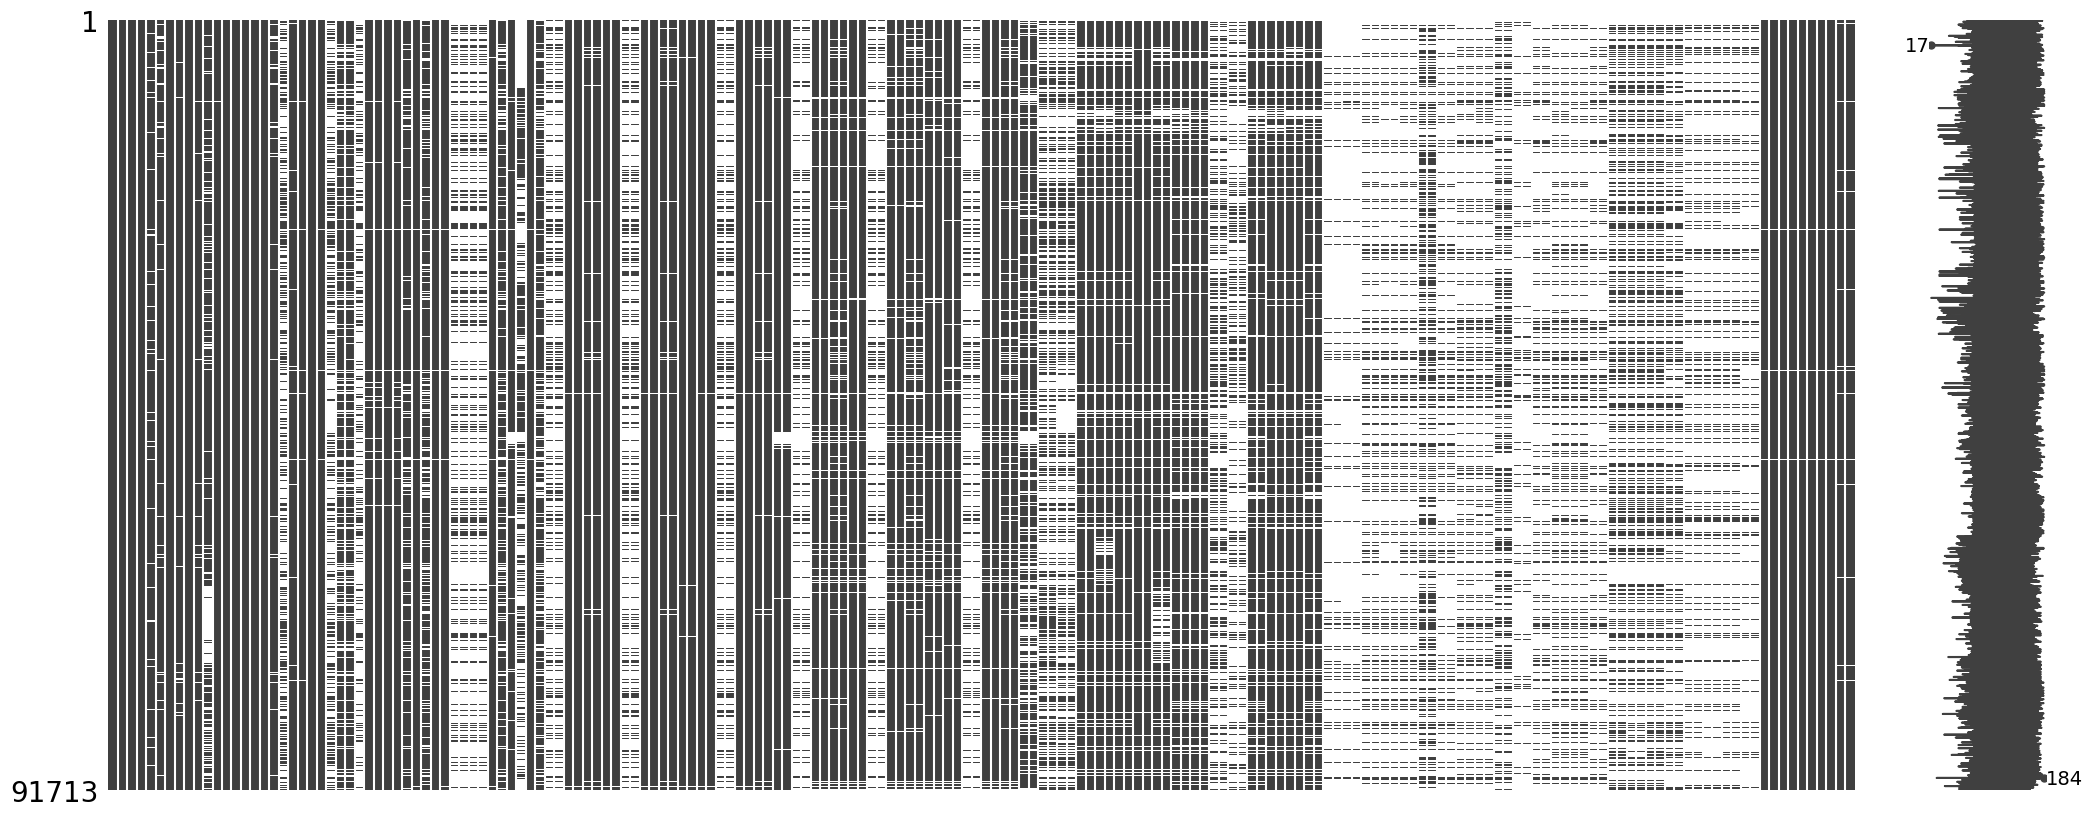

In [ ]:
#Matrix Chart
msno.matrix(df)
plt.savefig('matrix.png', dpi=150)

<Axes: >

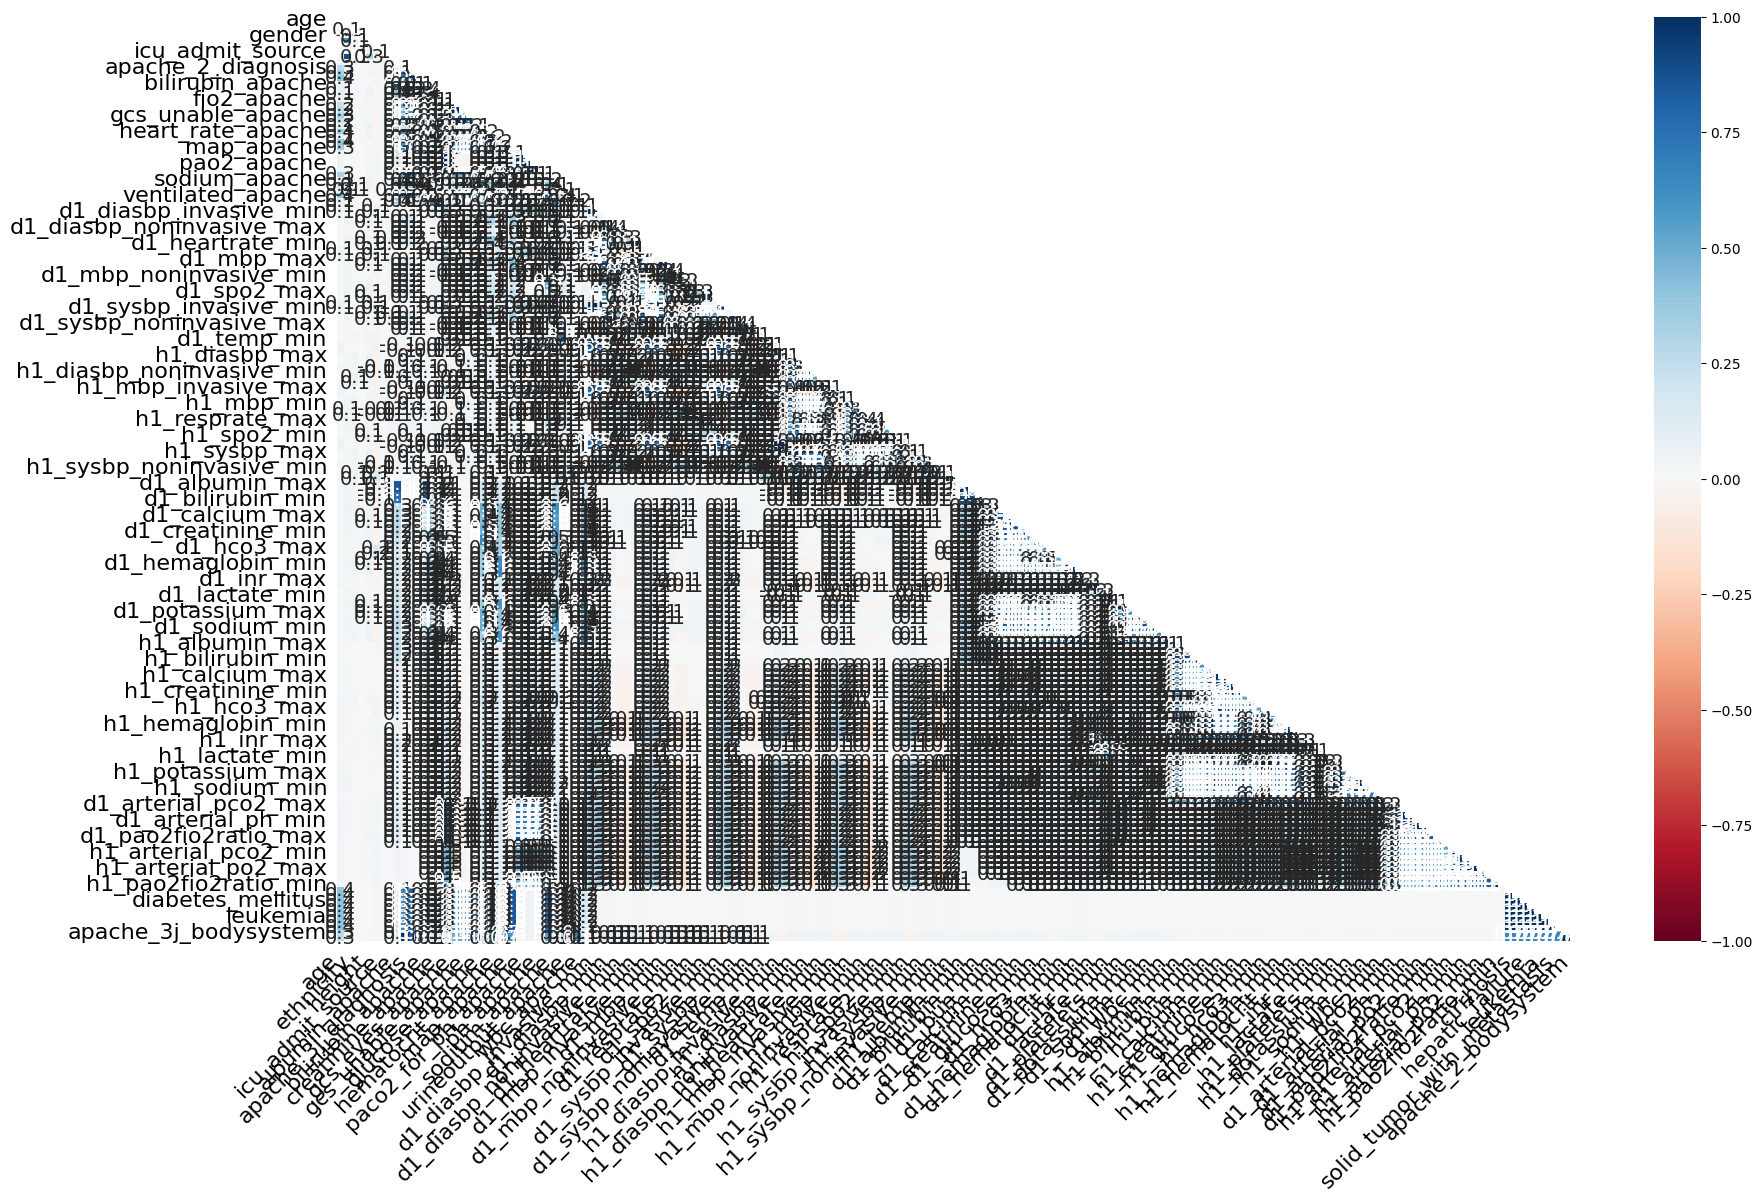

In [ ]:
#Heatmap
msno.heatmap(df)

ככל שמתחבר יותר למטה - יותר קורלטיבי

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

<Axes: >

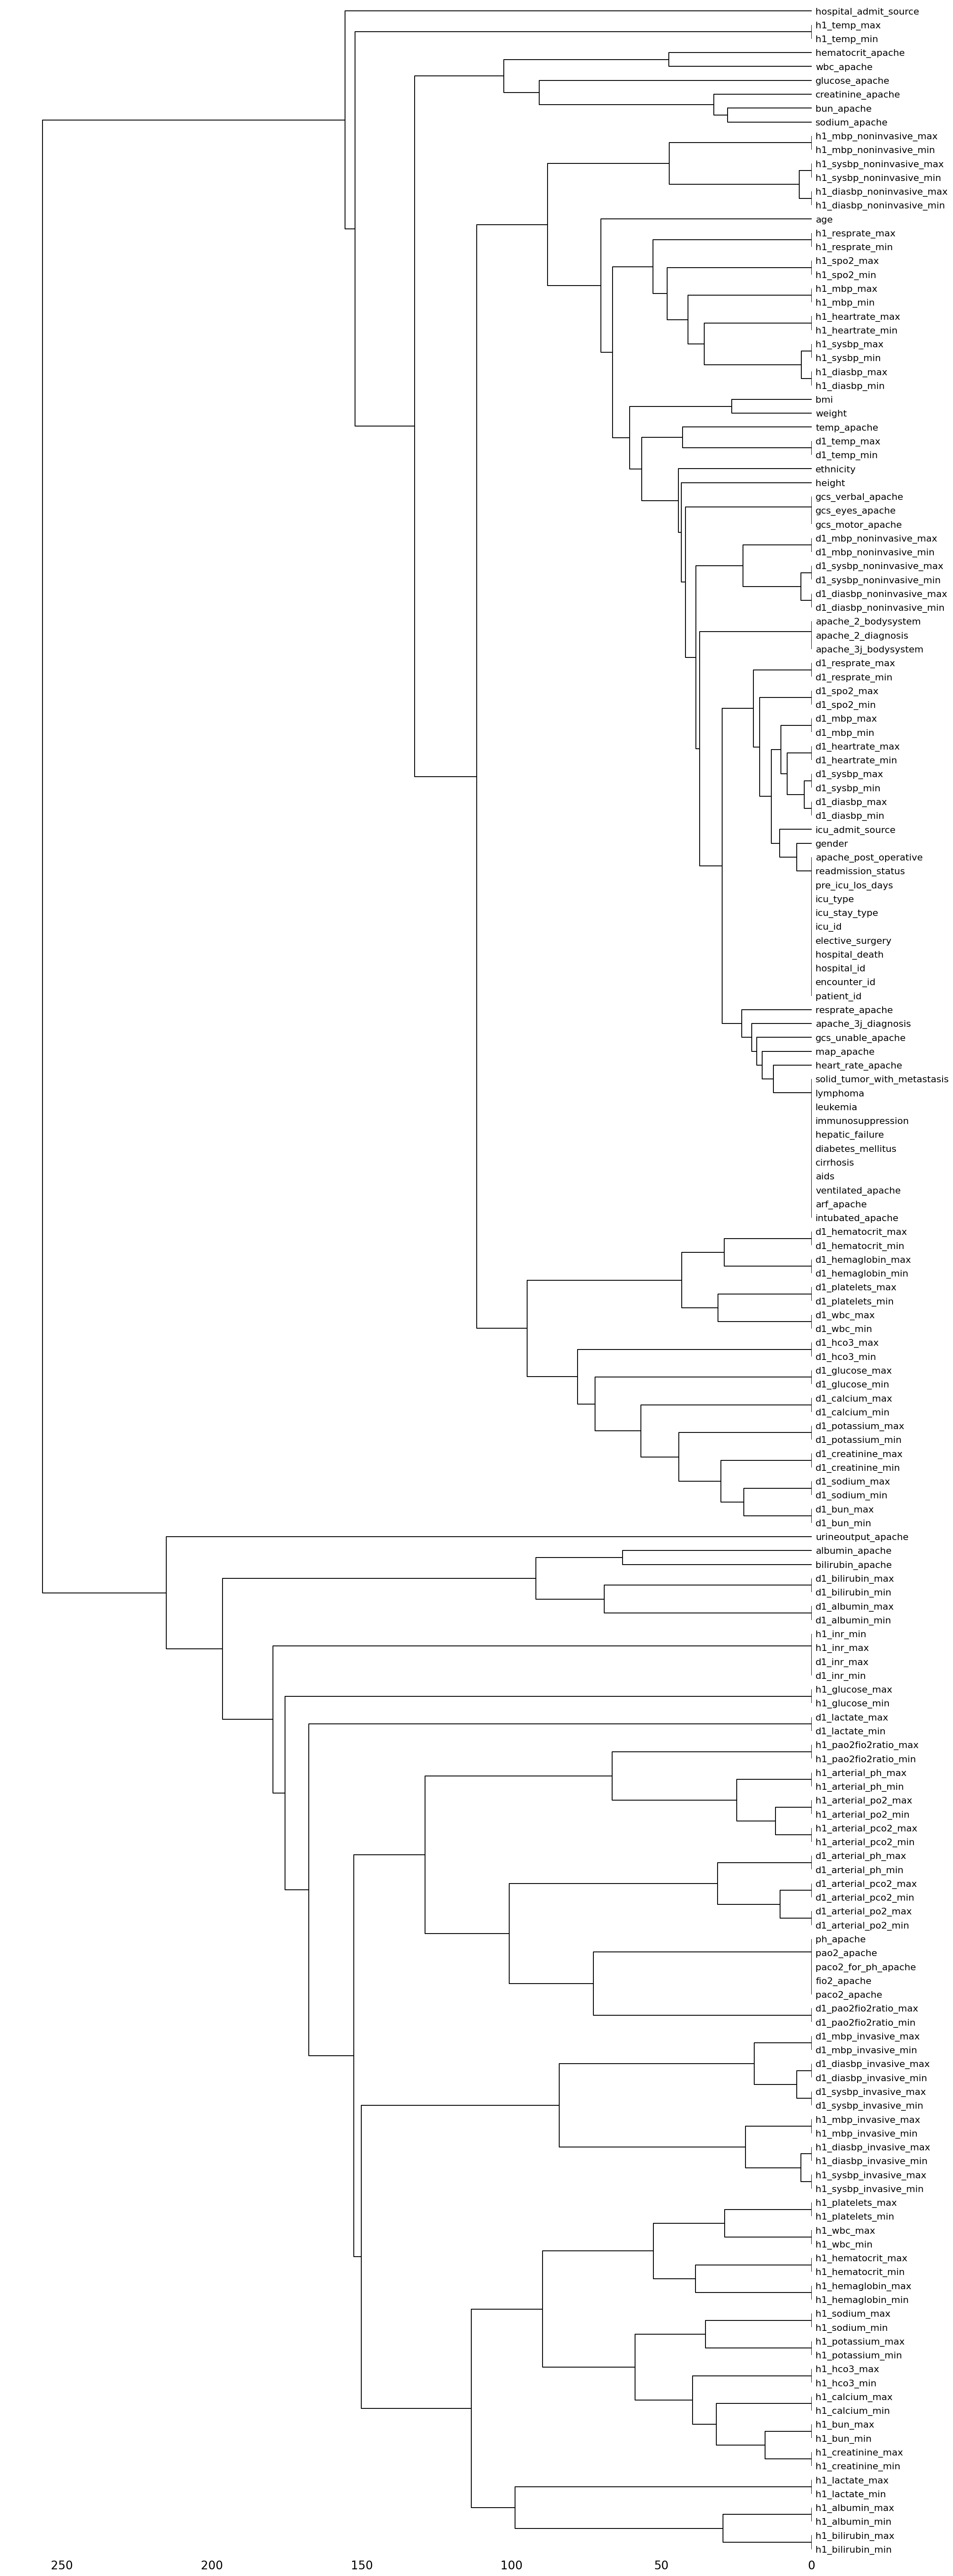

In [ ]:
#Dendrogram
msno.dendrogram(df)

#first method: complete case analysis


Listwise deletion is preferred when there is a Missing Completely at Random case. In Listwise deletion entire rows(which hold the missing values) are deleted. It is also known as complete-case analysis as it removes all data that have one or more missing values. In python we use dropna() function for Listwise deletion.


In [ ]:
# Perform complete case analysis
complete_cases_df = df.dropna()

# Display the resulting DataFrame
print("DataFrame after complete case analysis:")
complete_cases_df

DataFrame after complete case analysis:


encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
8286          80443        9930           89               1  67.0  28.146291   
8492          66332       22503           89               0  60.0  34.574559   
8717         107612       82369           89               0  66.0  25.775925   
8727          88203       95246           89               0  55.0  56.659238   
9235          77729       21614           89               0  21.0  22.180764   
9585          88464       35049           89               0  54.0  20.385384   
10101        103283      101324           89               1  83.0  33.246642   
10228          8879       38347           89               1  19.0  23.169473   
12850         71711        5221          174               1  53.0  30.750308   
17433          9451       19629           98               1  73.0  30.008090   
26102        123549       90860           55               1  56.0  22.832972   
28308         75286       38022          161               0  56.0  18.974532   
31979         11857       97656           10               0  55.0  23.797637   
32464         77880       77866           10               1  83.0  26.597686   
34109         91380      110122          109               1  85.0  29.518012   
35624         31239      109525           70               0  76.0  30.305489   
41288         74495      104757          100               0  63.0  17.117498   
41618         36741       66907          100               0  51.0  42.907147   
41834         50780      120673          100               0  64.0  22.965352   
42198        111573      126639          186               1  50.0  34.041028   
42242         16194       98462          100               1  75.0  17.334341   
42849         48869      126571          100               0  60.0  40.163265   
43400         56508      118586          100               0  71.0  45.002583   
43524         62410       75754          100               1  68.0  42.455775   
50649        124931       37603          189               1  53.0  39.936885   
52032        126740      108681          133               0  64.0  36.000891   
90317          7654       20929           36               0  66.0  28.593750   

       elective_surgery         ethnicity gender  height  ... aids cirrhosis  \
8286                  0         Caucasian      M  167.64  ...  0.0       0.0   
8492                  0         Caucasian      M  177.80  ...  0.0       0.0   
8717                  1         Caucasian      M  185.40  ...  0.0       0.0   
8727                  0     Other/Unknown      F  162.60  ...  0.0       0.0   
9235                  0         Caucasian      M  182.90  ...  0.0       0.0   
9585                  0         Caucasian      F  172.70  ...  0.0       0.0   
10101                 0         Caucasian      M  162.60  ...  0.0       0.0   
10228                 0   Native American      M  175.30  ...  0.0       0.0   
12850                 0         Caucasian      F  162.60  ...  0.0       0.0   
17433                 0         Caucasian      M  172.70  ...  0.0       0.0   
26102                 0         Caucasian      M  172.70  ...  0.0       0.0   
28308                 0         Caucasian      F  154.00  ...  0.0       0.0   
31979                 1         Caucasian      M  185.40  ...  0.0       0.0   
32464                 0         Caucasian      F  165.10  ...  0.0       0.0   
34109                 0         Caucasian      M  180.34  ...  0.0       0.0   
35624                 0  African American      F  157.00  ...  0.0       0.0   
41288                 0         Caucasian      M  182.00  ...  0.0       0.0   
41618                 0         Caucasian      F  163.00  ...  0.0       0.0   
41834                 0         Caucasian      M  177.80  ...  0.0       0.0   
42198                 0         Caucasian      M  183.00  ...  0.0       0.0   
42242                 0         Caucasian      F  157.50  

In [ ]:
complete_cases_df.to_csv('complete_cases.csv', index=False)

# Second Method:• Keeping the missing values and using models that can use them as inputs





xgboost with original data without a change

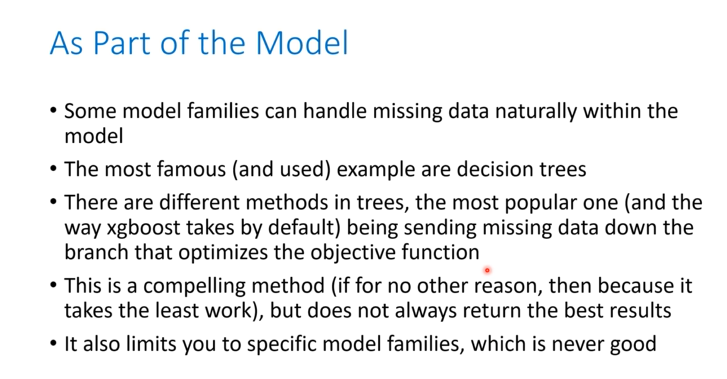


# Third Method: missing category - keep it continuous and add a “masking” column with values 0 when not missing and 1 when missing

In [ ]:
# Masking Column
# Create a copy of the DataFrame to avoid modifying the original data
masking_column_df = df.copy()

# Add masking columns with values 0 when not missing and 1 when missing
masking_columns = pd.DataFrame({col + '_masking': pd.isna(masking_column_df[col]).astype(int) for col in masking_column_df.columns})

# Concatenate the original DataFrame with the new masking columns
masking_column_df = pd.concat([masking_column_df, masking_columns], axis=1)

# Display the resulting DataFrame
print("\nDataFrame after Masking Column option:")
masking_column_df



DataFrame after Masking Column option:


encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
0             66154       25312          118               0  68.0  22.730000   
1            114252       59342           81               0  77.0  27.420000   
2            119783       50777          118               0  25.0  31.950000   
3             79267       46918          118               0  81.0  22.640000   
4             92056       34377           33               0  19.0        NaN   
...             ...         ...          ...             ...   ...        ...   
91708         91592       78108           30               0  75.0  23.060250   
91709         66119       13486          121               0  56.0  47.179671   
91710          8981       58179          195               0  48.0  27.236914   
91711         33776      120598           66               0   NaN  23.297481   
91712          1671       53612          104               0  82.0  22.031250   

       elective_surgery  ethnicity gender  height  ... aids_masking  \
0                     0  Caucasian      M   180.3  ...            0   
1                     0  Caucasian      F   160.0  ...            0   
2                     0  Caucasian      F   172.7  ...            0   
3                     1  Caucasian      F   165.1  ...            0   
4                     0  Caucasian      M   188.0  ...            0   
...                 ...        ...    ...     ...  ...          ...   
91708                 0  Caucasian      M   177.8  ...            0   
91709                 0  Caucasian      F   183.0  ...            0   
91710                 0  Caucasian      M   170.2  ...            0   
91711                 0  Caucasian      F   154.9  ...            0   
91712                 1  Caucasian      F   160.0  ...            0   

      cirrhosis_masking  diabetes_mellitus_masking hepatic_failure_masking  \
0                     0                          0                       0   
1                     0                          0                       0   
2                     0                          0                       0   
3                     0                          0                       0   
4                     0                          0                       0   
...                 ...                        ...                     ...   
91708                 0                          0                       0   
91709                 0                          0                       0   
91710                 0                          0                       0   
91711                 0                          0                       0   
91712                 0                          0                       0   

      immunosuppression_masking  leukemia_masking  lymphoma_masking  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                             0                 0                 0   
...                         ...               ...               ...   
91708                         0                 0                 0   
91709                         0                 0                 0   
91710                         0                 0                 0   
91711                         0                 0                 0   
91712                         0                 0                 0   

       solid_tumor_with_metastasis_masking  apache_3j_bodysystem_masking  \
0                                        0                             0   
1                                        0                             0   
2                                        0                             0   
3                                        0                             0   
4          

In [ ]:
masking_column_df.to_csv('missing_category_option_masking.csv', index=False)

# **“missing” category** - discretize the column with missing data and add a new level “missing”

In [ ]:
# Create a copy of the DataFrame to avoid modifying the original data
missing_category_df = df.copy()

Treating categorical features and numeric features differently

In [ ]:
def num_cat_col(df):
    '''
    Splits the columns of the dataframe into categorical and numerical columns
    and returns them as 2 separate lists.
    Columns having binary values (0 or 1) are added to the list of categorical columns.
    '''
    num_col = []
    cat_col = []
    new_dictionary = column_descriptions[column_descriptions['Data Type'] == 'binary']

    for column in df.columns:
        if df[column].dtypes == 'object':
            cat_col.append(column)
        elif column in [value for key, value in new_dictionary['Variable Name'].items()]:
            cat_col.append(column)
        else:
            num_col.append(column)
    return cat_col, num_col

cat_col, num_col = num_cat_col(missing_category_df)

missing values count before imputing:

In [ ]:
# Count missing values in each column
missing_values_per_column = missing_category_df.isna().sum()

# Set option to display all rows
pd.set_option('display.max_rows', None)

# Display the count of missing values per column
print("Missing values per column:")
print(missing_values_per_column)

Missing values per column:
encounter_id                       0
patient_id                         0
hospital_id                        0
hospital_death                     0
age                             4228
bmi                             3429
elective_surgery                   0
ethnicity                       1395
gender                            25
height                          1334
hospital_admit_source          21409
icu_admit_source                 112
icu_id                             0
icu_stay_type                      0
icu_type                           0
pre_icu_los_days                   0
readmission_status                 0
weight                          2720
albumin_apache                 54379
apache_2_diagnosis              1662
apache_3j_diagnosis             1101
apache_post_operative              0
arf_apache                       715
bilirubin_apache               58134
bun_apache                     19262
creatinine_apache              18853
fio2_apache

fill categorical columns with the value "missing"

In [ ]:
# Fill missing values in categorical columns with "missing"
missing_category_df[cat_col] = missing_category_df[cat_col].fillna("missing")

# Display the DataFrame after filling missing values
print("DataFrame after filling missing values in categorical columns:")

missing_category_df

Current count of missing values:

In [ ]:
# Count missing values in each column
missing_values_per_column = missing_category_df.isna().sum()

# Set option to display all rows
pd.set_option('display.max_rows', None)

# Display the count of missing values per column
print("Missing values per column:")
print(missing_values_per_column)

Missing values per column:
encounter_id                       0
patient_id                         0
hospital_id                        0
hospital_death                     0
age                             4228
bmi                             3429
elective_surgery                   0
ethnicity                          0
gender                             0
height                          1334
hospital_admit_source              0
icu_admit_source                   0
icu_id                             0
icu_stay_type                      0
icu_type                           0
pre_icu_los_days                   0
readmission_status                 0
weight                          2720
albumin_apache                 54379
apache_2_diagnosis              1662
apache_3j_diagnosis             1101
apache_post_operative              0
arf_apache                         0
bilirubin_apache               58134
bun_apache                     19262
creatinine_apache              18853
fio2_apache

made discrtization to 10 bins for each numerical column and inserted "missing" in each missing value

In [ ]:
for col in num_col:
    missing_category_df[col] = pd.cut(missing_category_df[col], bins=10, labels=False)

# Fill missing values in categorical columns with "missing"
missing_category_df[num_col] = missing_category_df[num_col].fillna("missing")

there are no missing values anymore, now the data can be fitted to logistic reg and KNN

In [ ]:
# Count missing values in each column
missing_values_per_column = missing_category_df.isna().sum()

# Set option to display all rows
pd.set_option('display.max_rows', None)

# Display the count of missing values per column
print("Missing values per column:")
print(missing_values_per_column)

Missing values per column:
encounter_id                   0
patient_id                     0
hospital_id                    0
hospital_death                 0
age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
gender                         0
height                         0
hospital_admit_source          0
icu_admit_source               0
icu_id                         0
icu_stay_type                  0
icu_type                       0
pre_icu_los_days               0
readmission_status             0
weight                         0
albumin_apache                 0
apache_2_diagnosis             0
apache_3j_diagnosis            0
apache_post_operative          0
arf_apache                     0
bilirubin_apache               0
bun_apache                     0
creatinine_apache              0
fio2_apache                    0
gcs_eyes_apache                0
gcs_motor_apache               0
gcs_unable_apach

In [ ]:
missing_category_df.to_csv('missing_category_discretization_and_missing_string.csv', index=False)

 # Impute Central Tendency ((mean of column/median of column/mode of column))

### **mean and mode method**

In [ ]:
# Create a copy of the DataFrame to avoid modifying the original data
central_tendency_df = df.copy()

fill missing values:
continious - mean,
categorical - mode

In [ ]:
# Fill missing values in categorical columns with mode
central_tendency_df[cat_col] = central_tendency_df[cat_col].apply(lambda x: x.fillna(x.mode()[0]))

# Fill missing values in continuous columns with mean
columns_to_fill = num_col[:,2]
central_tendency_df[columns_to_fill] = central_tendency_df[columns_to_fill].fillna(central_tendency_df[columns_to_fill].mean())


checked it filled properly:

In [ ]:
# Count missing values in each column
missing_values_per_column = central_tendency_df.isna().sum()

# Set option to display all rows
pd.set_option('display.max_rows', None)

# Display the count of missing values per column
print("Missing values per column:")
print(missing_values_per_column)

Missing values per column:
encounter_id                   0
patient_id                     0
hospital_id                    0
hospital_death                 0
age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
gender                         0
height                         0
hospital_admit_source          0
icu_admit_source               0
icu_id                         0
icu_stay_type                  0
icu_type                       0
pre_icu_los_days               0
readmission_status             0
weight                         0
albumin_apache                 0
apache_2_diagnosis             0
apache_3j_diagnosis            0
apache_post_operative          0
arf_apache                     0
bilirubin_apache               0
bun_apache                     0
creatinine_apache              0
fio2_apache                    0
gcs_eyes_apache                0
gcs_motor_apache               0
gcs_unable_apach

In [ ]:
missing_category_df.to_csv('central_tendency_mean_and_mode.csv', index=False)

### **median and mode**

In [ ]:
central_tendency_df1 = df.copy()

fill missing values: continious - median, categorical - mode

In [ ]:
# Fill missing values in categorical columns with mode
central_tendency_df1[cat_col] = central_tendency_df1[cat_col].apply(lambda x: x.fillna(x.mode()[0]))

# Fill missing values in continuous columns with median
columns_to_fill = num_col[:,2]  # Exclude the first two columns
central_tendency_df1[columns_to_fill] = central_tendency_df1[columns_to_fill].fillna(central_tendency_df1[columns_to_fill].median())



checked it filled properly:

In [ ]:
# Count missing values in each column
missing_values_per_column = central_tendency_df1.isna().sum()

# Set option to display all rows
pd.set_option('display.max_rows', None)

# Display the count of missing values per column
print("Missing values per column:")
print(missing_values_per_column)

Missing values per column:
encounter_id                   0
patient_id                     0
hospital_id                    0
hospital_death                 0
age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
gender                         0
height                         0
hospital_admit_source          0
icu_admit_source               0
icu_id                         0
icu_stay_type                  0
icu_type                       0
pre_icu_los_days               0
readmission_status             0
weight                         0
albumin_apache                 0
apache_2_diagnosis             0
apache_3j_diagnosis            0
apache_post_operative          0
arf_apache                     0
bilirubin_apache               0
bun_apache                     0
creatinine_apache              0
fio2_apache                    0
gcs_eyes_apache                0
gcs_motor_apache               0
gcs_unable_apach

In [ ]:
central_tendency_df1.to_csv('central_tendency_median_and_mode.csv', index=False)

## Varios imputing methods:


## Single Imputation Method with IterativeImputer(but only running it once for single imputition) sklearn

- We import IterativeImputer from scikit-learn and enable it using enable_iterative_imputer.
- We import a regressor, in this case, BayesianRidge, which will be used to predict missing values.
- We initialize IterativeImputer with the chosen regressor and other parameters like max_iter (maximum number of iterations) and random_state.
- We fit and transform the DataFrame using the fit_transform method of IterativeImputer.

This approach iteratively predicts missing values using a regression model, taking into account the relationships between variables.

באמצעות רגרסיה, מילוי הערכים של העמודה - דטרמיניסטי ע"ב המידע בעמודה

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import OneHotEncoder

In [ ]:
single_impute_df = df.copy()

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(single_impute_df[cat_col]))

# Concatenate encoded columns with the original DataFrame after dropping the original categorical columns
df_encoded = pd.concat([single_impute_df.drop(columns=cat_col), encoded_cols], axis=1)

df_encoded.columns = df_encoded.columns.astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_encoded.head()

encounter_id  patient_id  hospital_id   age    bmi  height  icu_id  \
0         66154       25312          118  68.0  22.73   180.3      92   
1        114252       59342           81  77.0  27.42   160.0      90   
2        119783       50777          118  25.0  31.95   172.7      93   
3         79267       46918          118  81.0  22.64   165.1      92   
4         92056       34377           33  19.0    NaN   188.0      91   

   pre_icu_los_days  weight  albumin_apache  ...   99  100  101  102  103  \
0          0.541667    73.9             2.3  ...  0.0  0.0  0.0  0.0  0.0   
1          0.927778    70.2             NaN  ...  0.0  0.0  0.0  0.0  0.0   
2          0.000694    95.3             NaN  ...  0.0  0.0  1.0  0.0  0.0   
3          0.000694    61.7             NaN  ...  0.0  0.0  0.0  0.0  0.0   
4          0.073611     NaN             NaN  ...  0.0  0.0  0.0  0.0  0.0   

   104  105  106  107  108  
0  0.0  0.0  0.0  0.0  0.0  
1  1.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  
4  0.0  1.0  0.0  0.0  0.0  

[5 rows x 269 columns]

In [ ]:

# Initialize IterativeImputer
imputer = IterativeImputer(max_iter=1, random_state=0)

# Fit and transform the DataFrame
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


checked it worked properly:

In [ ]:
# Count missing values in each column
missing_values_per_column = df_imputed.isna().sum()

# Set option to display all rows
pd.set_option('display.max_rows', None)

# Display the count of missing values per column
print("Missing values per column:")
print(missing_values_per_column)

Missing values per column:
encounter_id                 0
patient_id                   0
hospital_id                  0
age                          0
bmi                          0
height                       0
icu_id                       0
pre_icu_los_days             0
weight                       0
albumin_apache               0
apache_2_diagnosis           0
apache_3j_diagnosis          0
bilirubin_apache             0
bun_apache                   0
creatinine_apache            0
fio2_apache                  0
gcs_eyes_apache              0
gcs_motor_apache             0
gcs_verbal_apache            0
glucose_apache               0
heart_rate_apache            0
hematocrit_apache            0
map_apache                   0
paco2_apache                 0
paco2_for_ph_apache          0
pao2_apache                  0
ph_apache                    0
resprate_apache              0
sodium_apache                0
temp_apache                  0
urineoutput_apache           0
wbc_apache  

In [ ]:
df_imputed.to_csv('Single_Imputation.csv', index=False)

## Multiple Imputation

נעשה איקס רגרסיות על כל עמודה במטרה לחזות את באמצעותם את הערכים החסרים, ומתוכם נדגום ערך בסכוסטיות ע"ב ההתפלגות שנוצרה כתוצאה מהממוצע והשונות של העמודה הרלוונטית



In [ ]:
pip install miceforest --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 255.9 MB/s eta 0:00:00


In [ ]:
import miceforest as mf

In [ ]:
df1 = df.copy()
# Convert object-type columns to categorical
object_columns = df1.select_dtypes(include=['object']).columns
df1[object_columns] = df1[object_columns].astype('category')
# Initialize the ImputationKernel
kernel = mf.ImputationKernel(df1)

# Run the MICE algorithm for 2 iterations
kernel.mice(2)

# Retrieve the imputed dataset
imputed_data = kernel.complete_data()



In [ ]:
imputed_data.to_csv('Multiple_Imputation_using_miceforest.csv', index=False)

## Vizualizations:

For bilirubin_apache:

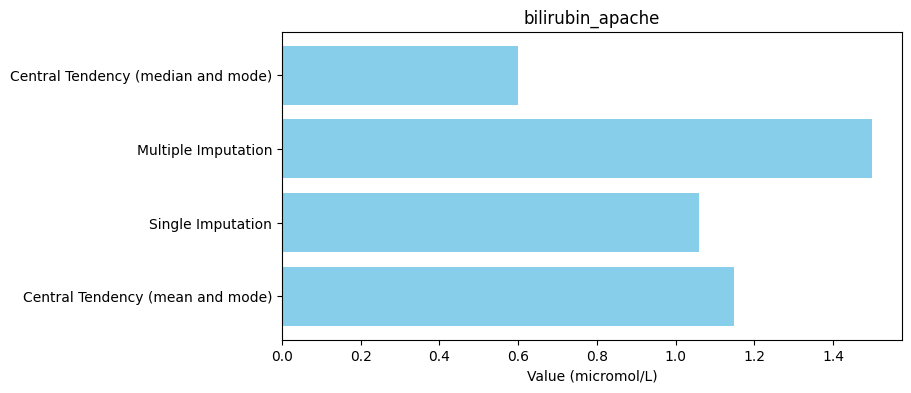

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

imputation_data = pd.DataFrame({
    'bilirubin_apache': [1.147721, 1.05822991303609, 1.5, 0.6],
}, index=['Central Tendency (mean and mode)', 'Single Imputation', 'Multiple Imputation', 'Central Tendency (median and mode)'])

# Plot data for bilirubin_apache separately
plt.figure(figsize=(8, 4))
plt.barh(imputation_data.index, imputation_data['bilirubin_apache'], color='skyblue')
plt.xlabel('Value (micromol/L)')
plt.title('bilirubin_apache')
plt.show()

For glucose_apache:

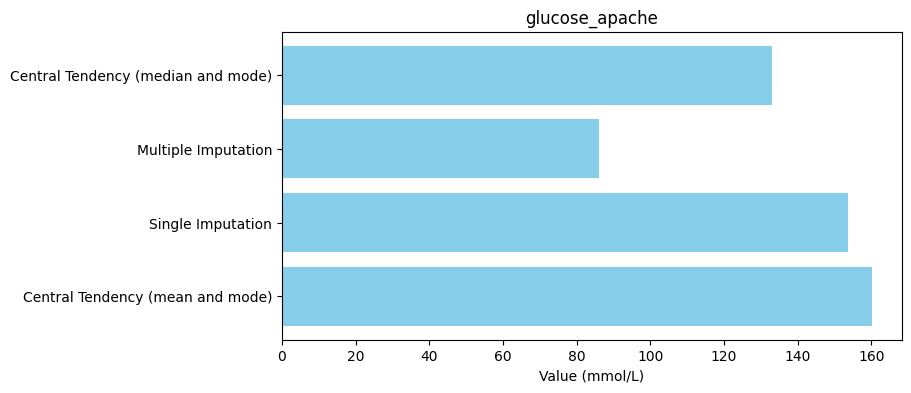

In [ ]:

imputation_data = pd.DataFrame({
    'glucose_apache': [160.32, 153.80, 86, 133],
}, index=['Central Tendency (mean and mode)', 'Single Imputation', 'Multiple Imputation', 'Central Tendency (median and mode)'])

# Plot data for glucose_apache separately
plt.figure(figsize=(8, 4))
plt.barh(imputation_data.index, imputation_data['glucose_apache'], color='skyblue')
plt.xlabel('Value (mmol/L)')
plt.title('glucose_apache')
plt.show()

For hematocrit_apache:



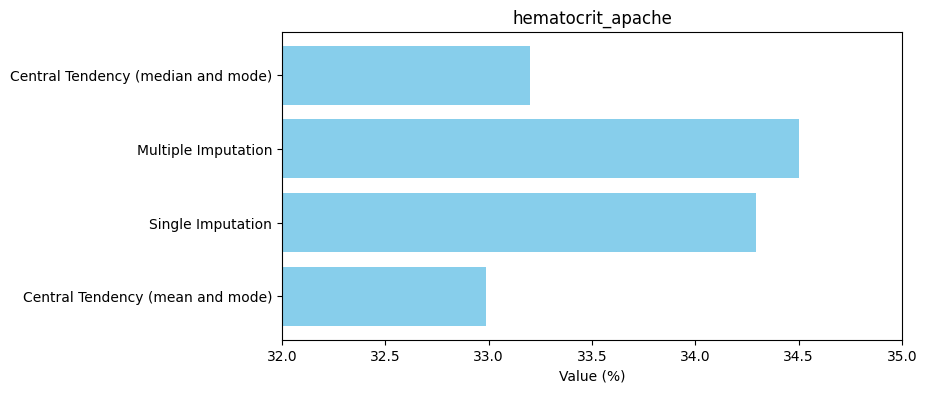

In [ ]:
# Sample data
imputation_data = pd.DataFrame({
    'hematocrit_apache': [32.988739, 34.2914322847889, 34.5, 33.2],
}, index=['Central Tendency (mean and mode)', 'Single Imputation', 'Multiple Imputation', 'Central Tendency (median and mode)'])

# Plot data for hematocrit_apache separately
plt.figure(figsize=(8, 4))
plt.barh(imputation_data.index, imputation_data['hematocrit_apache'], color='skyblue')
plt.xlabel('Value (%)')
plt.xlim(32, 35)
plt.title('hematocrit_apache')
plt.show()


For ph_apache:

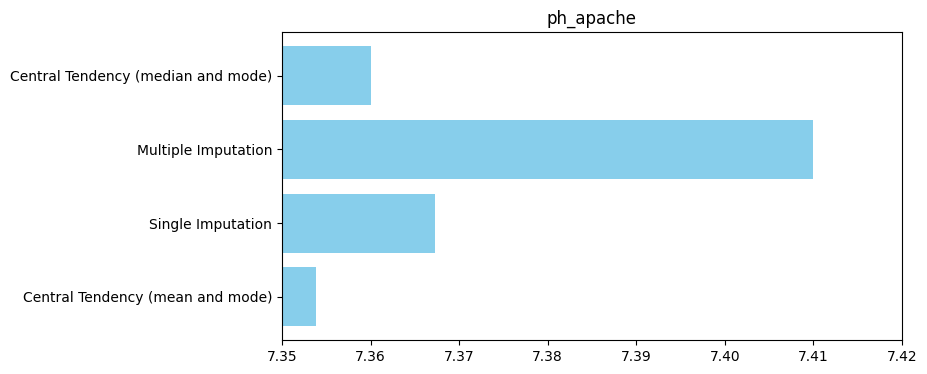

In [ ]:
# Sample data
imputation_data = pd.DataFrame({
    'ph_apache': [7.353895, 7.36727983461979, 7.41, 7.36],
}, index=['Central Tendency (mean and mode)', 'Single Imputation', 'Multiple Imputation', 'Central Tendency (median and mode)'])

# Plot data for ph_apache separately
plt.figure(figsize=(8, 4))
plt.barh(imputation_data.index, imputation_data['ph_apache'], color='skyblue')
plt.xlim(7.35, 7.42)
plt.title('ph_apache')
plt.show()


For wbc_apache:



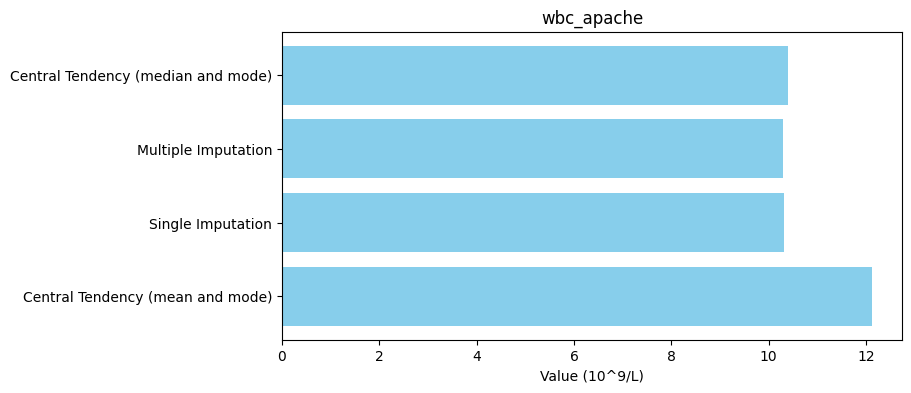

In [ ]:
# Sample data
imputation_data = pd.DataFrame({
    'wbc_apache': [12.133333, 10.3242284438891, 10.3, 10.4],
}, index=['Central Tendency (mean and mode)', 'Single Imputation', 'Multiple Imputation', 'Central Tendency (median and mode)'])

# Plot data for wbc_apache separately
plt.figure(figsize=(8, 4))
plt.barh(imputation_data.index, imputation_data['wbc_apache'], color='skyblue')
plt.xlabel('Value (10^9/L)')
plt.title('wbc_apache')
plt.show()


Patient 74135 vizualtion:

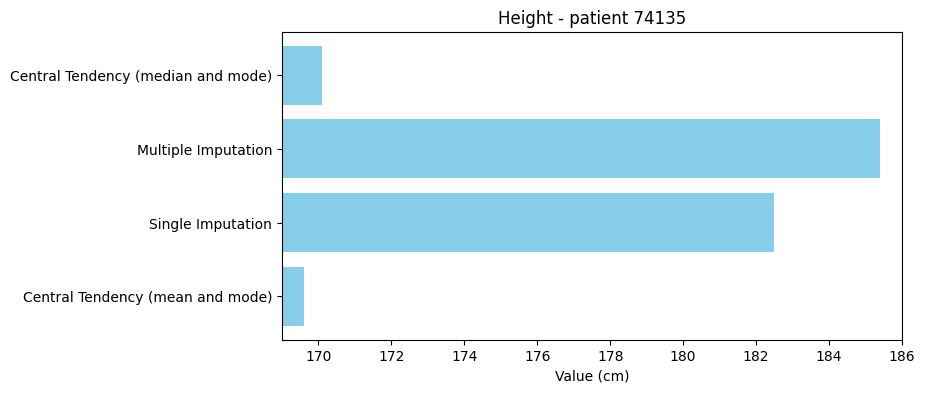

In [ ]:
## patient 74135
imputation_data = pd.DataFrame({
    'height (cm)': [169.6, 182.5, 185.4, 170.1],
}, index=['Central Tendency (mean and mode)', 'Single Imputation', 'Multiple Imputation', 'Central Tendency (median and mode)'])

# Plot data for wbc_apache separately
plt.figure(figsize=(8, 4))
plt.barh(imputation_data.index, imputation_data['height (cm)'], color='skyblue')
plt.xlabel('Value (cm)')
plt.title('Height - patient 74135')
plt.xlim(169, 186)
plt.show()
